In [5]:
def Sun_threshold(L, U, lambda_, y):
    theta = U / L
    con_numer = 2 * lambda_ * theta
    con_denom = ((1 - lambda_) ** 2 + 4 * lambda_ * theta) ** (1/2) - (1 - lambda_)
    con = con_numer / con_denom
    rob = theta / con

    if y < (L * con):
        threshold = L * con
    elif y < (L * rob):
        threshold = lambda_ * L * rob + (1 - lambda_) * y / con
    else:
        threshold = L * rob

    return threshold

def OMS_threshold(L, U, lambda_, y):
    M = lambda_ * L + (1 - lambda_) * (L * U) ** (1/2)
    theta = U / L

    if y <= M:
        threshold = (L * U) ** (1/2)
    elif y <= (L * U) ** (1/2):
        threshold = y
    else:
        miu_numer = (1 - lambda_) * (theta) ** (1/2)
        miu_denom = (1 - lambda_) * (theta) ** (1/2) + lambda_
        miu = miu_numer / miu_denom
        threshold = miu * (L * U) ** (1/2) + (1 - miu) * y

    return threshold

def Prediction_Specific_Con_Rob(L, U, thres, y):
    if thres > y:
        con_ALG = L
    elif thres <= y:
        con_ALG = thres
    con_OPT = y

    con = con_OPT / con_ALG

    if thres > (L * U) ** (1/2):
        rob = thres / L
    else:
        rob = U / thres

    return con, rob

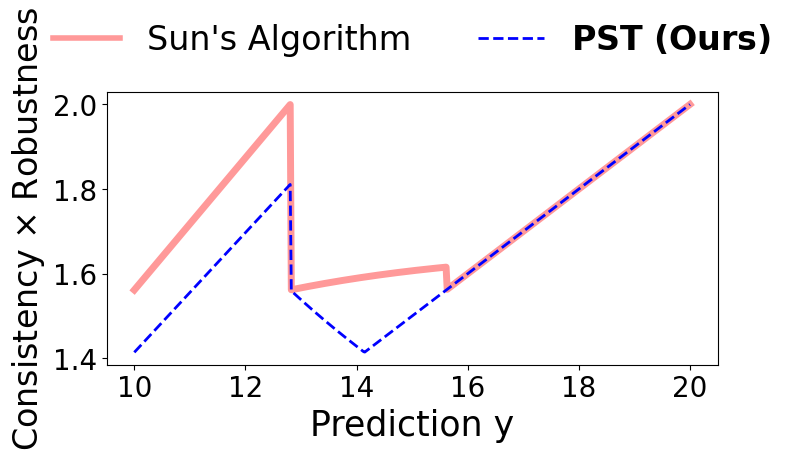

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

L = 10
U = 20
lambda_ = 0.5
y_values = np.linspace(L, U, 500)

con_rob_sun, con_rob_oms = [], []

for y in y_values:
    thres_sun = Sun_threshold(L, U, lambda_, y)
    c_sun, r_sun = Prediction_Specific_Con_Rob(L, U, thres_sun, y)
    con_rob_sun.append(c_sun * r_sun)  
    
    theta = U / L
    con_numer = 2 * lambda_ * theta
    con_denom = ((1 - lambda_) ** 2 + 4 * lambda_ * theta) ** 0.5 - (1 - lambda_)
    con_Sun = con_numer / con_denom
    lambda_oms = (theta**0.5 - con_Sun) / (theta**0.5 - 1)
    thres_oms = OMS_threshold(L, U, lambda_oms, y)
    c_oms, r_oms = Prediction_Specific_Con_Rob(L, U, thres_oms, y)
    con_rob_oms.append(c_oms * r_oms)

plt.figure(figsize=(8, 5))

color_red = 'red'

plt.plot(y_values, con_rob_sun, color=color_red, linestyle='-', linewidth=5, alpha=0.4)

plt.plot(y_values, con_rob_oms, color='blue', linestyle='--', linewidth=2, alpha=1.0)

plt.xlabel('Prediction y', fontsize=25)
plt.ylabel(r'Consistency $\times$ Robustness', fontsize=24)
plt.tick_params(labelsize=20)

custom_lines = [
    Line2D([0], [0], color=color_red, linestyle='-', linewidth=4, alpha=0.4),
    Line2D([0], [0], color='blue', linestyle='--', linewidth=2)
]
custom_labels = [
    "Sun's Algorithm",
    r"$\bf{PST\ (Ours)}$"
]

plt.legend(
    custom_lines, custom_labels,
    fontsize=24,
    loc='lower center',
    bbox_to_anchor=(0.5, 1.02),
    ncol=2,
    frameon=False
)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()